In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [71]:
path = "C:/Users/avnit/Downloads"
filename = "/Train_Data.csv"
new_data = pd.read_csv(path+filename)
new_data

,0,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,25366,city_103,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,5,<10,Pvt Ltd,1,71,0
18355,25545,city_160,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,15,50-99,Pvt Ltd,1,160,0
18356,11514,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,3,18,0
18357,1689,city_75,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Oct-49,Pvt Ltd,3,41,0


In [72]:
#To change the name of the column
new_data.rename(mapper = {'0':'enrollee_id'},axis = 1,inplace = True)
new_data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,25366,city_103,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,5,<10,Pvt Ltd,1,71,0
18355,25545,city_160,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,15,50-99,Pvt Ltd,1,160,0
18356,11514,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,3,18,0
18357,1689,city_75,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Oct-49,Pvt Ltd,3,41,0


In [73]:
# To find the unique values
new_data['company_size'].unique()

array(['100-500', '<10', '50-99', nan, '5000-9999', '10000+', '1000-4999',
       '500-999', 'Oct-49'], dtype=object)

In [74]:
# To change special characters from numbers:
new_data['company_size']=np.where(new_data['company_size']=='<10', '0-10',new_data['company_size'])
new_data['company_size']

0        100-500
1           0-10
2          50-99
3          50-99
4            NaN
          ...   
18354       0-10
18355      50-99
18356      50-99
18357     Oct-49
18358    100-500
Name: company_size, Length: 18359, dtype: object

In [75]:
new_data['company_size']=np.where(new_data['company_size']=='Oct-49', '10-49',new_data['company_size'])
new_data['company_size']

0        100-500
1           0-10
2          50-99
3          50-99
4            NaN
          ...   
18354       0-10
18355      50-99
18356      50-99
18357      10-49
18358    100-500
Name: company_size, Length: 18359, dtype: object

In [77]:
new_data['relevent_experience'].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [78]:
new_data['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', 'Part time course', nan],
      dtype=object)

In [79]:
new_data['education_level'].unique()

array(['Graduate', 'Masters', 'High School', 'Phd', nan, 'Primary School'],
      dtype=object)

In [80]:
new_data['major_discipline'].unique()

array(['STEM', 'Other', 'No Major', nan, 'Business Degree', 'Arts',
       'Humanities'], dtype=object)

In [81]:
new_data['experience'].unique()

array(['3', '14', '6', '8', '>20', '4', '9', '15', '10', '1', '5', '16',
       '11', '12', '7', '2', '13', '<1', '19', '18', '17', nan, '20'],
      dtype=object)

In [82]:
new_data['company_size'].unique()

array(['100-500', '0-10', '50-99', nan, '5000-9999', '10000+',
       '1000-4999', '500-999', '10-49'], dtype=object)

In [83]:
new_data['last_new_job'].unique()

array(['1', '2', '3', '>4', 'never', '4', nan], dtype=object)

In [84]:
new_data['training_hours'].unique()

array([106,  69,   4,  26,  88,  34,  23,   8,  10,  85,  55,  13,  51,
        28,  35,  42,  45,  11,  12,  54,  89,  41, 298, 101, 114, 104,
        53,  39,  20, 109,   3,  68, 262,  16,  22,  67,  43,   7,  30,
         9, 112,  21, 166, 110,  18,  79,  98,  65,  61,  44, 170, 132,
       145,  48,  46,  37,  86,  96,  33, 152, 168, 128, 102,   6,  50,
        36,  90, 164,  56,  32,  17, 126,  72,  15,  80,  25,  31, 160,
        66,  24, 200,  47,  83,  58,  29, 206,  14, 105,  91, 218,  75,
        57,  19, 144,  92,  94, 184,  62, 140,  52, 258, 178, 270, 108,
       157, 156, 123,  59,  82,  60,   2, 196,  95,  84,   5, 146, 202,
       100, 111, 254,  27, 336,  64, 107,  76,  38, 134, 330, 204, 320,
        74,  73,  40,  87, 316, 118, 122, 282, 248, 153, 147,  70, 131,
       113, 216, 292,  81, 176,  78, 222, 163,  63, 280, 210, 294, 264,
       155,  77,  97, 224, 180, 236, 125, 162, 116, 158, 256,  49,  71,
       326,   1, 238, 124, 268, 214, 192, 232, 276, 165, 138, 31

In [85]:
new_data['target'].unique()

array([0, 1], dtype=int64)

In [87]:
new_data['gender'].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [88]:
new_data['enrollee_id'].unique()

array([23798, 29166,    46, ..., 11514,  1689,  5995], dtype=int64)

In [89]:
# To count the items:
new_data['relevent_experience'].value_counts()

Has relevent experience    13596
No relevent experience      4763
Name: relevent_experience, dtype: int64

In [90]:
new_data['enrolled_university'].value_counts()

no_enrollment       13659
Full time course     3187
Part time course     1171
Name: enrolled_university, dtype: int64

In [91]:
new_data['education_level'].value_counts()

Graduate          10769
Masters            4319
High School        2032
Phd                 459
Primary School      323
Name: education_level, dtype: int64

In [92]:
new_data['major_discipline'].value_counts()

STEM               13738
Humanities           688
Other                343
Business Degree      307
Arts                 239
No Major             206
Name: major_discipline, dtype: int64

In [93]:
new_data['experience'].value_counts()

>20    3437
5      1309
4      1250
3      1159
6      1125
2       992
9       979
10      967
7       950
8       755
15      695
11      667
14      602
16      549
12      497
1       452
<1      416
13      412
17      347
19      308
18      286
20      146
Name: experience, dtype: int64

In [94]:
new_data['company_size'].value_counts()

50-99        3120
100-500      2698
10000+       2044
10-49        1466
1000-4999    1399
0-10         1360
500-999       902
5000-9999     591
Name: company_size, dtype: int64

In [95]:
new_data['last_new_job'].value_counts()

1        7567
>4       3339
2        2835
never    2186
4        1038
3        1027
Name: last_new_job, dtype: int64

In [96]:
new_data['training_hours'].value_counts()

28     307
12     291
18     285
20     269
22     263
      ... 
266      6
244      6
272      5
238      4
286      4
Name: training_hours, Length: 241, dtype: int64

In [97]:
new_data['target'].value_counts()

0    15934
1     2425
Name: target, dtype: int64

In [98]:
new_data['gender'].value_counts()

Male      12884
Female     1188
Other       189
Name: gender, dtype: int64

In [99]:
new_data['enrollee_id'].value_counts()

23798    1
14320    1
31431    1
7145     1
26060    1
        ..
16754    1
30680    1
21162    1
2261     1
5995     1
Name: enrollee_id, Length: 18359, dtype: int64

In [100]:
#This method will remove the row which has all missing value
new_data.dropna(how='all')

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,0-10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,25366,city_103,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,5,0-10,Pvt Ltd,1,71,0
18355,25545,city_160,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,15,50-99,Pvt Ltd,1,160,0
18356,11514,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,3,18,0
18357,1689,city_75,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10-49,Pvt Ltd,3,41,0


In [103]:
# This method will replace all NAN value in numerical columns with 0:
new_data['city_development_index'].fillna(0,inplace=True)

In [104]:
new_data['experience'].fillna(0,inplace=True)

In [106]:
new_data['company_size'].fillna(0,inplace=True)

In [107]:
new_data['last_new_job'].fillna(0,inplace=True)

In [108]:
new_data['training_hours'].fillna(0,inplace=True)

In [109]:
new_data['target'].fillna(0,inplace=True)

In [110]:
#This method hasnans will give, if their is any missing values in particular column
new_data['city_development_index'].hasnans

False

In [111]:
new_data['experience'].hasnans

False

In [112]:
new_data['company_size'].hasnans

False

In [113]:
new_data['last_new_job'].hasnans

False

In [114]:
new_data['training_hours'].hasnans

False

In [115]:
new_data['target'].hasnans

False

In [116]:
#This will gives the no.pf rows in df
len(new_data)

18359

In [117]:
#This will give you, how many unique value in particular column
new_data['target'].nunique()

2

In [118]:
# To change into categorical form
new_data['target']= new_data['target'].astype('category')

In [119]:
new_data['training_hours'].nunique()

241

In [120]:
new_data['last_new_job'].nunique()

7

In [121]:
new_data['company_size']= new_data['company_size'].astype('category')

In [122]:
new_data['experience'].nunique()

23

In [123]:
new_data['city_development_index'].nunique()

93

In [124]:
new_data['enrollee_id'].nunique()

18359

In [62]:
#To check the size of the data
new_data.shape

(18359, 5)

In [63]:
#To check the datatypes of the variables
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  18359 non-null  float64
 1   company_size            13580 non-null  object 
 2   last_new_job            17992 non-null  object 
 3   training_hours          18359 non-null  int64  
 4   target                  18359 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 717.3+ KB


In [64]:
# To check first-five or to overview the data
new_data.head()

,city_development_index,company_size,last_new_job,training_hours,target
0,0.689,100-500,1,106,0
1,0.923,0-10,1,69,0
2,0.910,50-99,2,4,0
3,0.666,50-99,1,26,0
4,0.887,NaN,2,88,1


In [65]:
#To see the total duplicated values
new_data.duplicated().sum()

2879

In [66]:
new_data.columns

Index(['city_development_index', 'company_size', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [35]:
#To find the mean
cols = ['city_development_index','training_hours','target']
new_data[cols].mean()

city_development_index     0.847140
training_hours            65.899014
target                     0.132088
dtype: float64

In [36]:
new_data[cols].median()

city_development_index     0.91
training_hours            47.00
target                     0.00
dtype: float64

In [37]:
new_data[cols].mode()

,city_development_index,training_hours,target
0,0.92,28,0


In [38]:
new_data[cols].std()

city_development_index     0.110189
training_hours            60.885300
target                     0.338595
dtype: float64

In [39]:
# To find the percentile
new_data[cols].quantile()

city_development_index     0.91
training_hours            47.00
target                     0.00
Name: 0.5, dtype: float64

In [40]:
# To describe the dataframe
new_data.describe()

,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014,0.132088
std,9643.749725,0.110189,60.885300,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [41]:
# Summary  of categorical variables:

categorical = new_data.dtypes[new_data.dtypes=='object'].index
print(categorical)

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')


In [42]:
new_data[categorical].describe()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,18359,14261,18359,18017,17902,15521,18300,13580,13320,17992
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4358,12884,13596,13659,10769,13738,3437,3120,10051,7567


In [43]:
new_data.isnull()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18355,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18356,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18357,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
new_data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

C:\Users\avnit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


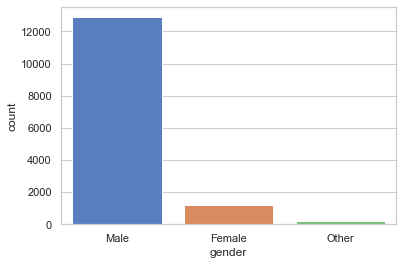

In [45]:
# Univariate Analysis

sns.set(style = 'whitegrid',palette = 'muted',color_codes = True)
sns.countplot(new_data.gender)
plt.show()

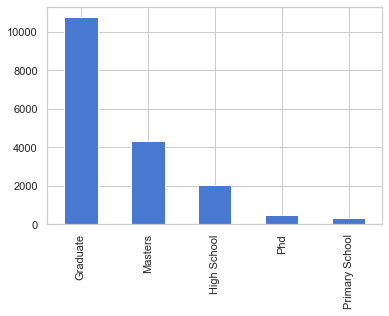

In [49]:
#Bi-Variate

#1. 
new_data['education_level'].value_counts().plot(kind='bar')
plt.show()

In [50]:
# Correlation Matrix


new_data = new_data[['city_development_index','company_size','last_new_job','training_hours','target']]
new_data


,city_development_index,company_size,last_new_job,training_hours,target
0,0.689,100-500,1,106,0
1,0.923,<10,1,69,0
2,0.910,50-99,2,4,0
3,0.666,50-99,1,26,0
4,0.887,NaN,2,88,1
...,...,...,...,...,...
18354,0.920,<10,1,71,0
18355,0.920,50-99,1,160,0
18356,0.926,50-99,3,18,0
18357,0.939,Oct-49,3,41,0


In [51]:
new_data.corr()

,city_development_index,training_hours,target
city_development_index,1.000000,-0.006193,-0.135700
training_hours,-0.006193,1.000000,-0.004735
target,-0.135700,-0.004735,1.000000


<AxesSubplot:>

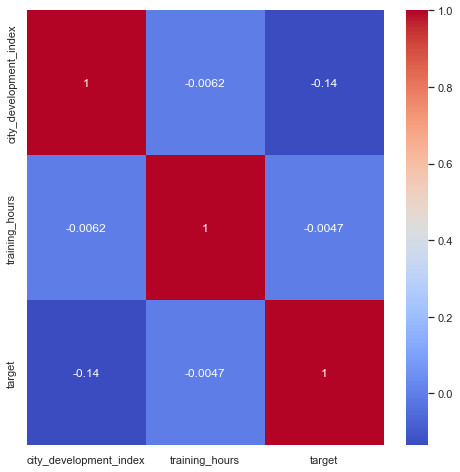

In [52]:
plt.figure(figsize=(8,8))
sns.heatmap(new_data.corr(),annot=True,cmap='coolwarm')

array([[<AxesSubplot:title={'center':'training_hours'}>]], dtype=object)

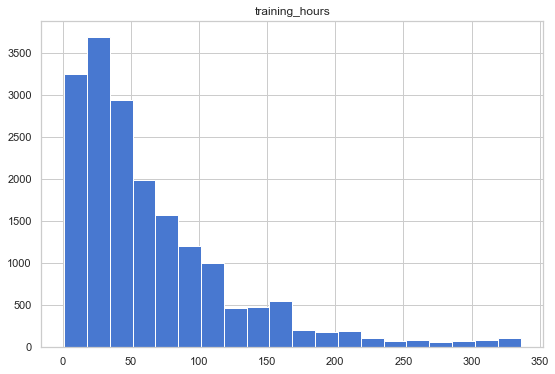

In [53]:
# Histogram

new_data.hist(column='training_hours',figsize=(9,6),bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c0468ef4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c0468efb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c0468ef1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c0468fb040>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c0468fb310>],
 'means': []}

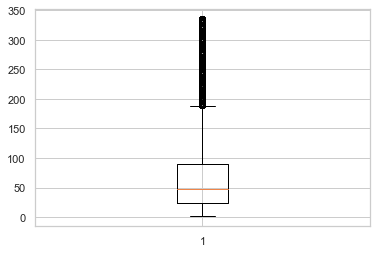

In [54]:
#Outliears

plt.boxplot(new_data.training_hours)

In [55]:
# Let find who had max training hours

index = np.where(new_data['training_hours']==max(new_data['training_hours']))
new_data.loc[index]

,city_development_index,company_size,last_new_job,training_hours,target
311,0.920,50-99,1,336,0
1402,0.920,500-999,1,336,0
3015,0.920,NaN,never,336,0
4126,0.920,50-99,1,336,0
9309,0.920,10000+,1,336,0
11841,0.848,50-99,4,336,1
15179,0.920,Oct-49,1,336,0
15202,0.920,Oct-49,2,336,0
15971,0.682,100-500,1,336,0


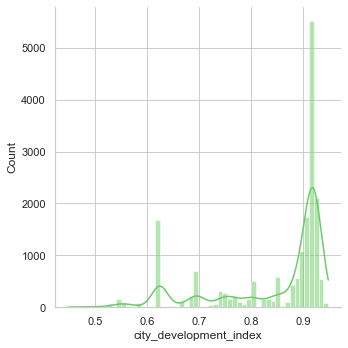

In [126]:
# Distribution

sns.displot(new_data.city_development_index, kde=True, color = 'g')
plt.show()

C:\Users\avnit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


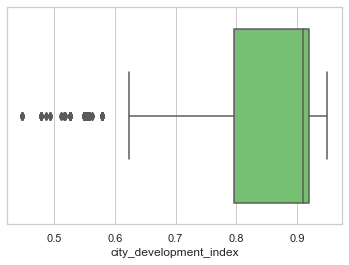

In [128]:
#Overview of city_development
sns.boxplot(new_data.city_development_index, color = 'g')
plt.show()

C:\Users\avnit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


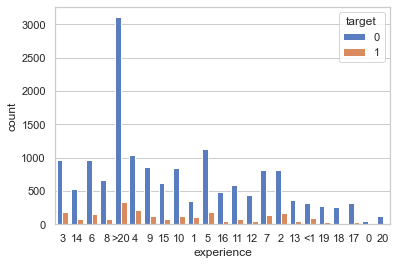

In [129]:
# Are enrolees with lower years of experience looking for a new job
 
sns.set(style = 'whitegrid',palette = 'muted',color_codes = True)
sns.countplot(new_data.experience, hue = new_data.target)
plt.show()

C:\Users\avnit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


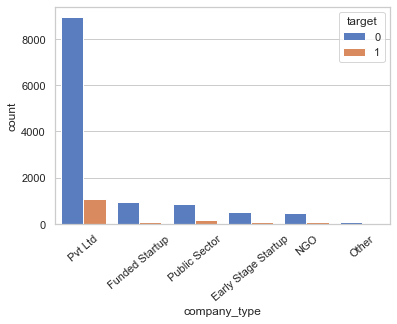

In [130]:
# Are private sector employees more inclined towards finding new jobs?
mask = new_data["company_type"] == "Pvt Ltd"
y = new_data[mask]


sns.set(style = 'whitegrid',palette = 'muted',color_codes = True)
sns.countplot(new_data.company_type, hue = new_data.target)
plt.xticks(rotation=40)
plt.show()

C:\Users\avnit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


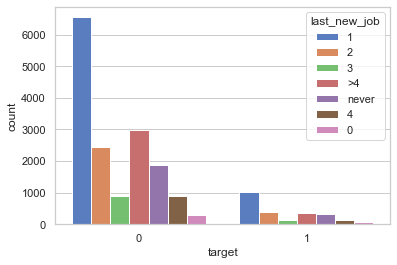

In [131]:
# Do enrolees looking for new jobs frequently change their jobs or spend considerable time in their last job?

new_data.sort_values("target",ascending=False)

sns.set(style = 'whitegrid',palette = 'muted',color_codes = True)
sns.countplot(new_data.target, hue = new_data.last_new_job)
plt.show()


C:\Users\avnit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


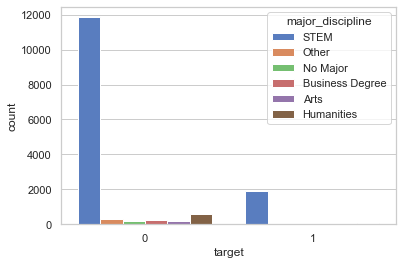

In [132]:
#Are non-STEM background enrolees are inclined for a new job?
mask = new_data["major_discipline"] == "STEM"
sns.set(style = 'whitegrid',palette = 'muted',color_codes = True)
sns.countplot(new_data.target, hue = new_data.major_discipline)
plt.show()